In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster         import KMeans 

# Reading in the Excel file

survey = pd.read_excel('survey_data-1.xlsx')
survey.head(n=5)

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,...,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,a1000,4,3,4,3,4,2,3,2,3,...,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,a1001,2,4,3,4,3,3,2,3,4,...,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,a1002,4,4,5,1,4,3,2,2,5,...,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,a1003,4,5,3,3,3,3,5,3,5,...,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,a1004,5,4,4,4,3,3,3,3,3,...,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


In [2]:
# Converting column names to lowercase to avoid typos during the analysis
survey.columns = map(str.lower, survey.columns)

# Getting the column names 
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 79 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   surveyid                                                                      147 non-null    object
 1   am the life of the party                                                      147 non-null    int64 
 2   feel little concern for others                                                147 non-null    int64 
 3   am always prepared                                                            147 non-null    int64 
 4   get stressed out easily                                                       147 non-null    int64 
 5   have a rich vocabulary                                                        147 non-null    int64 
 6   don't talk a lot                          

In [3]:
# Assessing quality of data by comparing the answers of duplicate questions

survey['testq1'] = 0
survey['testq2'] = 0
survey['testq3'] = 0

for index, col in survey.iterrows():
    survey.loc[index, 'testq1'] = survey.loc[index, 'respond effectively to multiple priorities.1'] - \
                                  survey.loc[index, 'respond effectively to multiple priorities']
    survey.loc[index, 'testq2'] = survey.loc[index, 'take initiative even when circumstances, objectives, or rules aren\'t clear.1'] - \
                                  survey.loc[index, 'take initiative even when circumstances, objectives, or rules aren\'t clear']
    survey.loc[index, 'testq3'] = survey.loc[index, 'encourage direct and open discussions.1'] - \
                                  survey.loc[index, 'encourage direct and open discussions'] 

# Checking for the range of differences in responses between the duplicate questions
print(survey['testq1'].value_counts())
print(survey['testq2'].value_counts())
print(survey['testq3'].value_counts())

 0    118
 1     16
-1     10
 2      3
Name: testq1, dtype: int64
 0    128
 1     10
-1      6
 2      2
-2      1
Name: testq2, dtype: int64
 0    124
-1     10
 1      9
-2      2
 2      1
 4      1
Name: testq3, dtype: int64


In [4]:
# Identifying the outlier based on the survey inconsistencies

survey[survey['testq3']==4]

,surveyid,am the life of the party,feel little concern for others,am always prepared,get stressed out easily,have a rich vocabulary,don't talk a lot,am interested in people,leave my belongings around,am relaxed most of the time,...,what laptop do you currently have?,what laptop would you buy in next assuming if all laptops cost the same?,what program are you in?,what is your age?,gender,what is your nationality?,what is your ethnicity?,testq1,testq2,testq3
99,a1099,1,2,3,1,3,5,4,5,5,...,Windows laptop,Macbook,DD (MIB & Business Analytics),24,Male,Indonesian,Far east Asian,2,0,4


In [5]:
# Dropping the inconsistent row (respondent)
survey = survey.drop(99,
                    axis=0)

# Checking whether the inconsistency has been removed
print(survey['testq3'].value_counts())

 0    124
-1     10
 1      9
-2      2
 2      1
Name: testq3, dtype: int64


In [6]:
# Dropping the duplicate columns

survey = survey.drop(['respond effectively to multiple priorities.1',
                     'take initiative even when circumstances, objectives, or rules aren\'t clear.1',
                     'encourage direct and open discussions.1'],
                     axis=1)

survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 146
Data columns (total 79 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   surveyid                                                                    146 non-null    object
 1   am the life of the party                                                    146 non-null    int64 
 2   feel little concern for others                                              146 non-null    int64 
 3   am always prepared                                                          146 non-null    int64 
 4   get stressed out easily                                                     146 non-null    int64 
 5   have a rich vocabulary                                                      146 non-null    int64 
 6   don't talk a lot                                          

In [7]:
# Identifying the questions that go against the personality trait being measured
negatives=["feel little concern for others",
            "am not interested in other people's problems",
            "am not really interested in others",
            "insult people",
            "leave my belongings around",
            "make a mess of things",
            "often forget to put things back in their proper place",
            "shirk my duties",
            "keep in the background",
            "am quiet around strangers",
            "have little to say",
            "don't talk a lot",
            "don't like to draw attention to myself",
            "am relaxed most of the time",
            "seldom feel blue",
            "have difficulty understanding abstract ideas",
            "am not interested in abstract ideas",
            "do not have a good imagination",
            "can't rally people on the team around a common goal",
            "don't persuasively sell a vision or idea",
            "don't  generate ideas that are new and different"]

for column in negatives:
    for index, col in survey.iterrows():
        if survey.loc[index,column]==4:
            survey.loc[index,column]=2
            continue
        elif survey.loc[index,column]==2:
            survey.loc[index,column]=4
            continue
        elif survey.loc[index,column]==1:
            survey.loc[index,column]=5
            continue
        elif survey.loc[index,column]==5:
            survey.loc[index,column]=1
            continue
        elif survey.loc[index,column]==3:
            continue
        else:
            print("Error!")

In [8]:
# Checking for new duplicate columns now that the data is more scaled

survey['testq4'] = 0
survey['testq5'] = 0

for index, col in survey.iterrows():
    survey.loc[index, 'testq4'] = survey.loc[index, 'often feel blue'] - \
                                  survey.loc[index, 'seldom feel blue']
    survey.loc[index, 'testq5'] = survey.loc[index, 'do not have a good imagination'] - \
                                  survey.loc[index, 'have a vivid imagination']

# Checking for the range of differences in responses between the duplicate questions
print(survey['testq4'].value_counts())
print(survey['testq5'].value_counts())

# We see inconsistencies in the responses but the questions are not exactly the same, 
# for which we have given the respondent the benefit of the doubt.

 0    58
-1    39
-2    15
 1    11
-4     8
-3     7
 2     5
 3     2
 4     1
Name: testq4, dtype: int64
 0    80
 1    23
-1    19
 2     8
-2     7
-3     4
-4     4
 4     1
Name: testq5, dtype: int64


In [9]:
# Renaming the columns after flipping the responses of the "negative" columns

for column in negatives:
    survey.rename(columns={column:"neg_"+column}, inplace=True) 

survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 146
Data columns (total 81 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   surveyid                                                                    146 non-null    object
 1   am the life of the party                                                    146 non-null    int64 
 2   neg_feel little concern for others                                          146 non-null    int64 
 3   am always prepared                                                          146 non-null    int64 
 4   get stressed out easily                                                     146 non-null    int64 
 5   have a rich vocabulary                                                      146 non-null    int64 
 6   neg_don't talk a lot                                      

In [10]:
# Subsetting the dataset into 3 based on the personalities, Hult DNA and demographics

personalities = survey.iloc[:,1:51]
hult_dna = survey.iloc[:,51:69]
demographics = survey.iloc[:,69:76]

In [11]:
#############################################
# Analyzing the Personality Type Information
#############################################

# Scaling the data
scaler=StandardScaler()

# Fitting the data
scaler.fit(personalities)

# Transforming the data
X_scaled_personalities=scaler.transform(personalities)

personalities_scaled=pd.DataFrame(X_scaled_personalities)

# Adding the column names of the original personalities DataFrame to the scaled data
personalities_scaled.columns=personalities.columns

"""
# Checking for outliers by running distplots on each column:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))
 
# initializing a counter
count = 0

# looping to create visualizations
for col in personalities_scaled:

    # condition to break
    if count == 51:
        break

    # increasing count
    count += 1

    # preparing histograms
    plt.subplot(26, 2, count)
    sns.distplot(a = personalities_scaled[col],
                 hist = True,
                 kde = True)

plt.savefig('personalities_scaled_plots.png')
plt.show()

# From this, we can see that the data is slightly skewed but there are no 
# outliers to be concerned about, so we will proceed with StandardScaler.
"""

"\n# Checking for outliers by running distplots on each column:\n# setting figure size\nfig, ax = plt.subplots(figsize = (12, 8))\n \n# initializing a counter\ncount = 0\n\n# looping to create visualizations\nfor col in personalities_scaled:\n\n    # condition to break\n    if count == 51:\n        break\n\n    # increasing count\n    count += 1\n\n    # preparing histograms\n    plt.subplot(26, 2, count)\n    sns.distplot(a = personalities_scaled[col],\n                 hist = True,\n                 kde = True)\n\nplt.savefig('personalities_scaled_plots.png')\nplt.show()\n\n# From this, we can see that the data is slightly skewed but there are no \n# outliers to be concerned about, so we will proceed with StandardScaler.\n"

In [12]:
########################################
# inertia
########################################
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

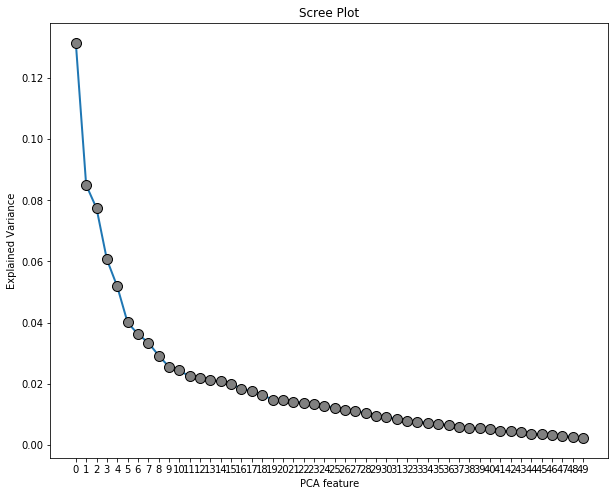

In [13]:
# Running PCA and displaying a scree plot

pca = PCA(n_components=None,
          random_state=802)

personalities_pca = pca.fit_transform(personalities_scaled)

scree_plot(pca_object = pca)

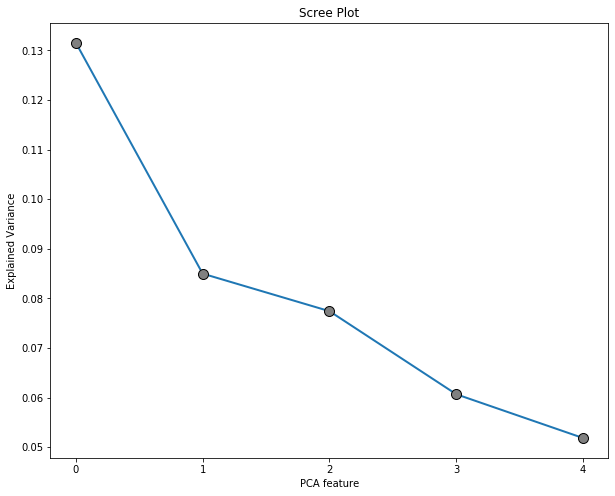

In [14]:
# INSTANTIATING a new model using the first three principal components
pca_5 = PCA(n_components=5,
            random_state = 802) 

# FITTING and TRANSFORMING the purchases_scaled
personalities_pca_5 = pca_5.fit_transform(personalities_scaled)

# calling the scree_plot function
scree_plot(pca_object = pca_5)

In [15]:
### Max PC Model ###

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))

# naming rows as original features
factor_loadings = factor_loadings.set_index(personalities_scaled.columns)
 

### 5 PC Model ###

# transposing pca components (pc = 5)
factor_loadings_5 = pd.DataFrame(pd.np.transpose(pca_5.components_))

# naming rows as original features
factor_loadings_5 = factor_loadings_5.set_index(personalities_scaled.columns)

# checking the results
print(f"""
5 Components Factor Loadings
------------------------------

{factor_loadings_5[1].round(2).sort_values()}

""")

# Examining each factor individually to determine personality types


5 Components Factor Loadings
------------------------------

neg_make a mess of things                                   -0.18
neg_have difficulty understanding abstract ideas            -0.10
neg_shirk my duties                                         -0.09
neg_leave my belongings around                              -0.07
neg_often forget to put things back in their proper place   -0.05
neg_insult people                                           -0.03
neg_keep in the background                                  -0.02
am always prepared                                           0.00
feel comfortable around people                               0.01
neg_feel little concern for others                           0.02
like order                                                   0.02
follow a schedule                                            0.02
neg_have little to say                                       0.03
am quick to understand things                                0.03
pay attention 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  del sys.path[0]


In [16]:
# naming each principal component

factor_loadings_5.columns = ['Neuroticism',
                             'Extroversion',
                             'Conscientiousness',
                             'Openness',
                             'Agreeableness']

In [17]:
# analyzing factor strengths per respondent

X_pca_reduced = pca_5.transform(personalities_scaled)
 

# converting to a DataFrame

X_pca_df = pd.DataFrame(X_pca_reduced)


# FITTING the scaler with the data

scaler.fit(X_pca_df)
 

# TRANSFORMING our data after fit

X_scaled = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame

pca_scaled = pd.DataFrame(X_scaled)

 
# reattaching column names

pca_scaled.columns = factor_loadings_5.columns


# checking pre- and post-scaling variance

#print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Neuroticism          1.0
Extroversion         1.0
Conscientiousness    1.0
Openness             1.0
Agreeableness        1.0
dtype: float64


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


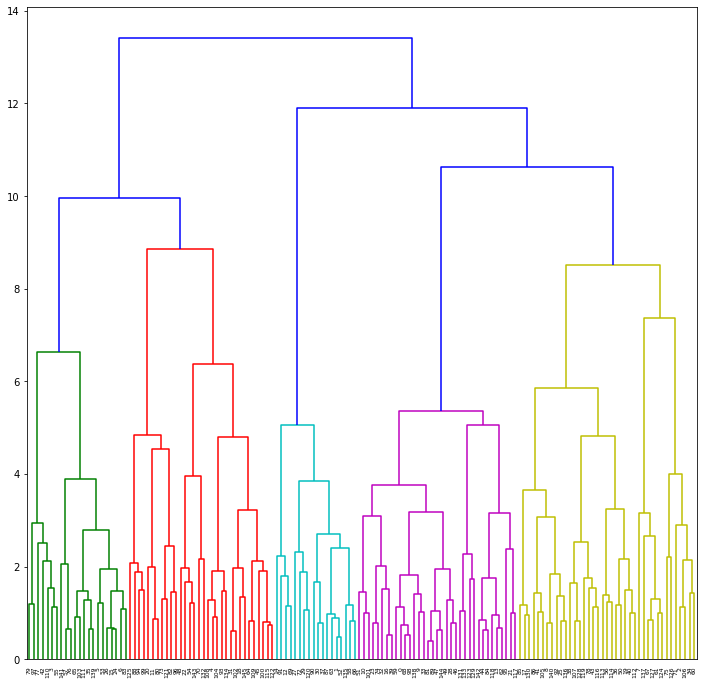

In [18]:
# Grouping data based on Ward distance

standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')


# setting plot size

fig, ax = plt.subplots(figsize=(12, 12))

 
# developing a dendrogram

dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

# saving and displaying the plot

plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

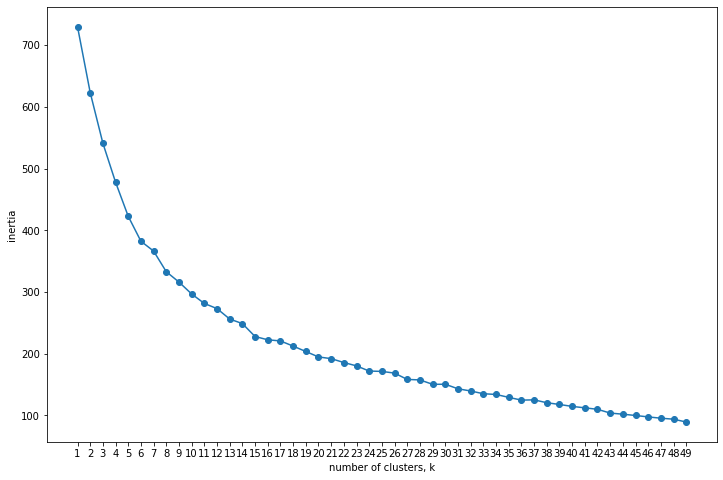

In [19]:
# Generating an inertia plot

inertia_plot(pca_scaled)

In [20]:
# INSTANTIATING a k-Means object with five clusters

customers_k_pca = KMeans(n_clusters = 5,
                        random_state = 802)


# fitting the object to the data

customers_k_pca.fit(pca_scaled)
 

# converting the clusters to a DataFrame

customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results

print(customers_kmeans_pca.iloc[: , 0].value_counts()) 

2    40
4    36
3    27
1    22
0    21
Name: Cluster, dtype: int64


In [21]:
# storing cluster centers

centroids_pca = customers_k_pca.cluster_centers_

 
# converting cluster centers into a DataFrame

centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components

centroids_pca_df.columns = ['Neuroticism',
                           'Extroversion',
                           'Conscientiousness',
                           'Openness',
                           'Agreeableness']

 
# checking results (clusters = rows, pc = columns)

centroids_pca_df.round(2)

,Neuroticism,Extroversion,Conscientiousness,Openness,Agreeableness
0,-0.02,-0.36,1.01,1.03,0.92
1,0.48,1.39,0.61,-0.49,0.36
2,-1.06,0.07,-0.24,0.04,-0.43
3,0.36,-0.15,-1.34,0.08,0.50
4,0.62,-0.60,0.31,-0.40,-0.66


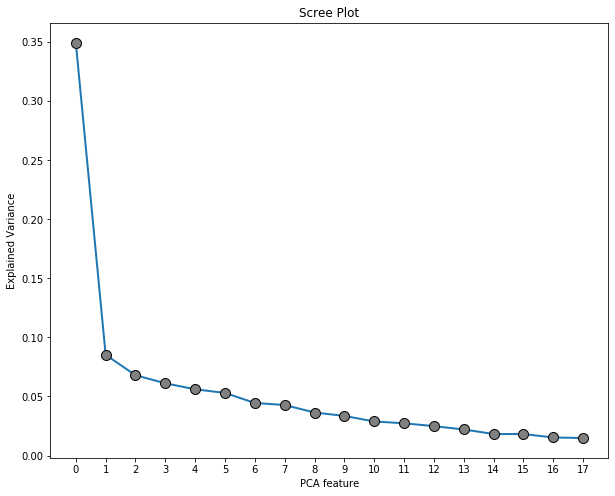

In [22]:
#############################################
# Analyzing the Hult DNA
#############################################

# Scaling, fitting and transforming the data
scaler.fit(hult_dna)
X_scaled_dna =scaler.transform(hult_dna)
dna_scaled=pd.DataFrame(X_scaled_dna)
dna_scaled.columns=hult_dna.columns

# Running PCA and displaying a scree plot
pca_dna = PCA(n_components=None,
          random_state=802)

dna_pca = pca_dna.fit_transform(dna_scaled)

scree_plot(pca_object = pca_dna)

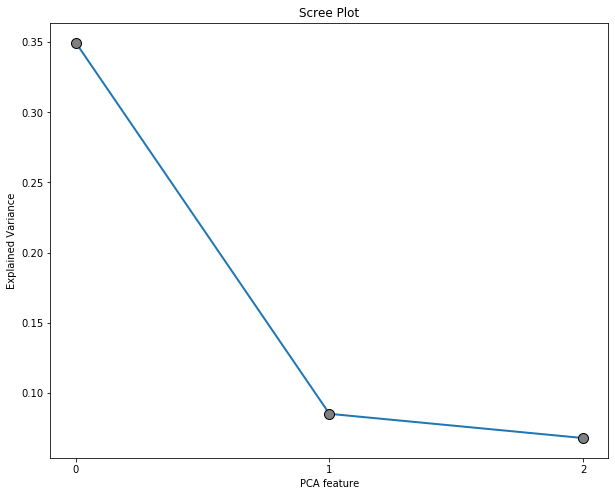

In [23]:
# Running scree plot for 3 features, as per the Hult DNA information

pca_dna_3 = PCA(n_components=3,
                random_state=802)

dna_pca_3 = pca_dna_3.fit_transform(dna_scaled)

scree_plot(pca_object = pca_dna_3)

In [24]:
# Examining each factor individually to determine personality types based on Hult DNA


### Max PC Model ###

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca_dna.components_))

# naming rows as original features
factor_loadings = factor_loadings.set_index(dna_scaled.columns)
 

### 5 PC Model ###

# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_dna_3.components_))

# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(dna_scaled.columns)

# checking the results
print(f"""
3 Components Factor Loadings
------------------------------

{factor_loadings_3[1].round(2).sort_values()}

""")


3 Components Factor Loadings
------------------------------

listen carefully to others                                                   -0.39
seek and use feedback from teammates                                         -0.27
work well with people from diverse cultural backgrounds                      -0.19
build cooperative relationships                                              -0.18
resolve conflicts constructively                                             -0.14
demonstrate an awareness of personal strengths and limitations               -0.07
effectively negotiate interests, resources, and roles                        -0.05
coach teammates for performance and growth                                   -0.04
display a growth mindset                                                     -0.03
drive for results                                                             0.09
respond effectively to multiple priorities                                    0.10
encourage direct and open

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  app.launch_new_instance()


In [25]:
# naming each principal component

factor_loadings_3.columns = ['Slackers',
                             'Leaders',
                             'Team Players']

In [28]:
# analyzing factor strengths 

X_pca_reduced_dna = pca_dna_3.transform(dna_scaled)


# converting to a DataFrame

X_pca_df_dna = pd.DataFrame(X_pca_reduced_dna)


# FITTING the scaler with the data

scaler.fit(X_pca_df_dna)

 
# TRANSFORMING our data after fit

X_scaled_dna = scaler.transform(X_pca_df_dna)

 
# converting scaled data into a DataFrame

pca_scaled_dna = pd.DataFrame(X_scaled_dna)


# reattaching column names

pca_scaled_dna.columns = factor_loadings_3.columns

 
# checking pre- and post-scaling variance

print(pd.np.var(X_pca_df_dna), '\n\n')
print(pd.np.var(pca_scaled_dna))

0    6.291804
1    1.534476
2    1.224150
dtype: float64 


Slackers        1.0
Leaders         1.0
Team Players    1.0
dtype: float64


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


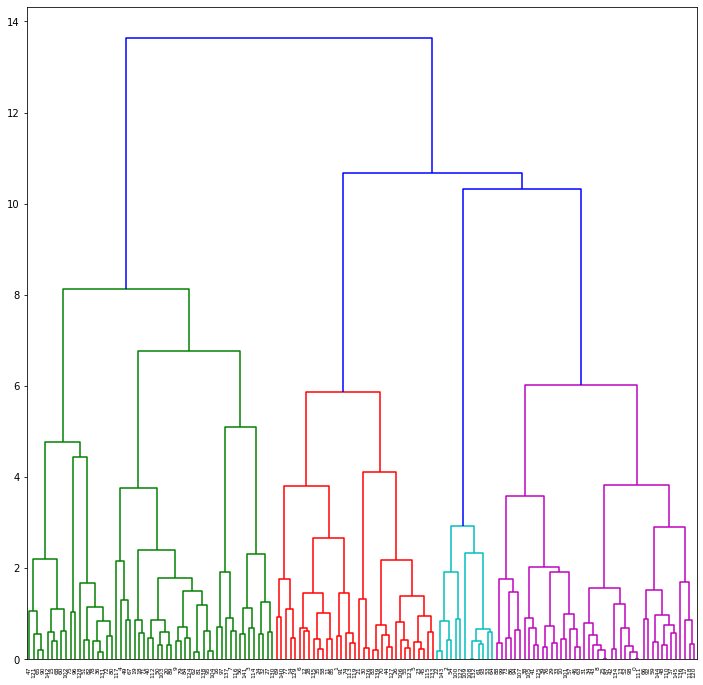

In [29]:
# grouping data based on Ward distance

standard_mergings_ward = linkage(y = pca_scaled_dna,
                                 method = 'ward')

 
# setting plot size

fig, ax = plt.subplots(figsize=(12, 12))

 

# developing a dendrogram

dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot

plt.savefig('standard_hierarchical_clust_ward_dna.png')
plt.show()

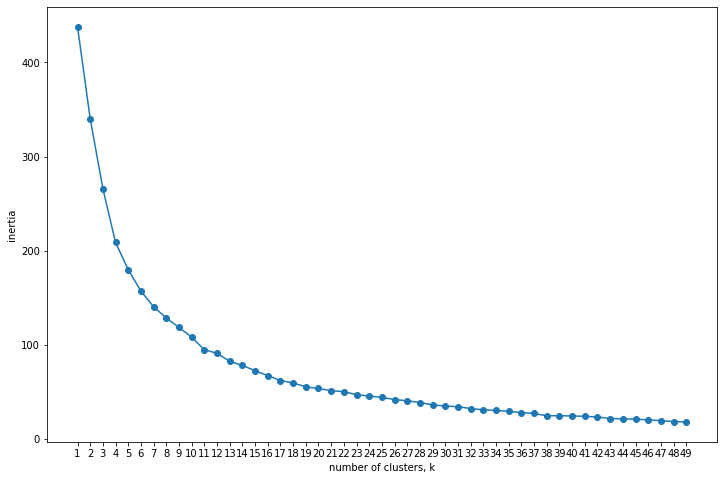

In [30]:
# Displaying an inertia plot 

inertia_plot(pca_scaled_dna)

In [31]:
# INSTANTIATING a k-Means object with three clusters

customers_k_pca_dna = KMeans(n_clusters = 3,
                             random_state = 802)

 
# fitting the object to the data

customers_k_pca_dna.fit(pca_scaled_dna)

 
# converting the clusters to a DataFrame

customers_kmeans_pca_dna = pd.DataFrame({'Cluster': customers_k_pca_dna.labels_})

 
# checking the results

print(customers_kmeans_pca_dna.iloc[: , 0].value_counts())

2    52
1    48
0    46
Name: Cluster, dtype: int64


In [32]:
# storing cluster centers

centroids_pca_dna = customers_k_pca_dna.cluster_centers_

 
# converting cluster centers into a DataFrame

centroids_pca_dna_df = pd.DataFrame(centroids_pca_dna)

 
# renaming principal components

centroids_pca_dna_df.columns = ['Slackers',
                               'Leaders',
                               'Team Players'] 
    
    
# checking results (clusters = rows, pc = columns)

centroids_pca_dna_df.round(2)

,Slackers,Leaders,Team Players
0,-0.35,-1.07,0.17
1,-0.73,0.84,-0.16
2,0.98,0.17,-0.01


In [33]:
######### MAIN ANALYSIS ############

# concatinating cluster memberships with principal components

clst_pca_df = pd.concat([pca_scaled,
                         pd.Series(customers_k_pca.labels_)],
                         axis = 1)


# checking results

clst_pca_df

,Neuroticism,Extroversion,Conscientiousness,Openness,Agreeableness,0
0,0.078151,-0.126722,0.319518,0.388435,-0.830071,4
1,0.305010,0.165389,0.917534,0.926797,1.076212,0
2,0.450056,-2.007631,-1.455595,1.756712,-0.425584,3
3,0.231358,1.497368,0.198776,-0.814736,1.455670,1
4,1.518878,0.597153,-0.697963,0.230336,0.011039,3
...,...,...,...,...,...,...
141,0.417536,0.801595,2.204956,-0.396568,0.674755,1
142,0.122016,-1.720297,-0.132524,-0.145183,-0.627338,4
143,1.216556,-1.239001,-0.665043,0.828069,-0.299039,4
144,-0.729701,0.251417,-0.125220,-0.594112,-0.718814,2


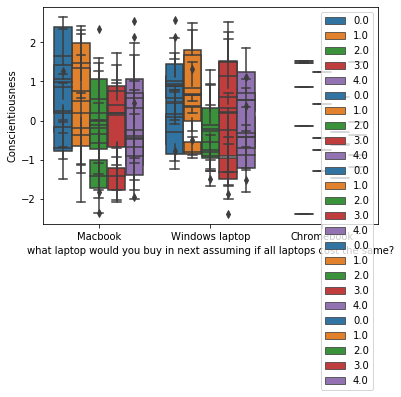

In [35]:
# concatenating demographic information with pca-clusters

final_pca_clust_df = pd.concat([demographics,
                                  clst_pca_df],
                                  axis = 1)


new_title="Cluster"
final_pca_clust_df.rename(columns={"0":"Cluster"},inplace=True)
final_pca_clust_df

 
sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Neuroticism',
            hue = 0,
            data = final_pca_clust_df)


sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Extroversion',
            hue = 0,
            data = final_pca_clust_df)


sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Openness',
            hue = 0,
            data = final_pca_clust_df)
 

sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Agreeableness',
            hue = 0,
            data = final_pca_clust_df)


sns.boxplot(x = 'what laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Conscientiousness',
            hue = 0,
            data = final_pca_clust_df)